In [1]:
# 와인 데이터 불러오기
from sklearn.datasets import load_wine
wine_data = load_wine()
data, target, columns = wine_data.data, wine_data.target, wine_data.feature_names

# 데이터프레임으로 해당 데이터셋 파악하기
import pandas as pd
pd.DataFrame(data=data,
             columns=columns).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


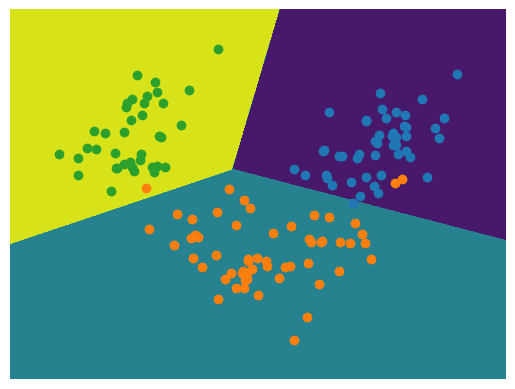

In [24]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(data,
                                                                      target,
                                                                      stratify=target,
                                                                      test_size=0.2,
                                                                      random_state=42)
# 전처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
train_scaled = ss.fit_transform(train_input)
test_scaled = ss.transform(test_input)

# PCA 변환
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)

# 결정 경계 그리기
import matplotlib.pyplot as plt
import numpy as np
x_min, x_max = train_pca[:, 0].min()-1, train_pca[:, 0].max()+1
y_min, y_max = train_pca[:, 1].min()-1, train_pca[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# 모델 훈련
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(train_pca, train_target)

# 경계 설정 하기
z = lr.predict(np.array([xx.ravel(), yy.ravel()]).T)
z = z.reshape(xx.shape)

# 그래프 그리기
plt.contourf(xx, yy, z)
for i in np.unique(train_target):
    plt.scatter(train_pca[train_target==i][:, 0], train_pca[train_target==i][:, 1])
    plt.axis('off')

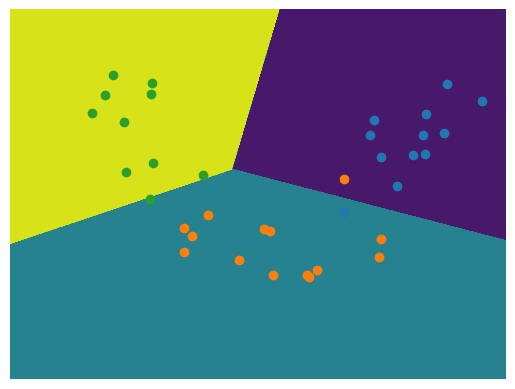

In [25]:
# 테스트 세트 분류하기
plt.contourf(xx, yy, z)
for i in np.unique(test_target):
    plt.scatter(test_pca[test_target==i][:, 0], test_pca[test_target==i][:, 1])
    plt.axis('off')

In [6]:
# 만약 분산을 알고 싶다면?
pca = PCA(n_components=None)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)
pca.explained_variance_ratio_

array([0.35792104, 0.19270671, 0.11019835, 0.07272276, 0.06721919,
       0.05131943, 0.04377423, 0.02500853, 0.0227943 , 0.01877102,
       0.01781765, 0.01256721, 0.00717958])

In [14]:
# 만약 분산을 알고 싶다면?
pca = PCA(n_components=0.54)
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)
pca.n_components_, np.sum(pca.explained_variance_ratio_)

(np.int64(2), np.float64(0.5506277578733124))

In [20]:
# n_components를 mle로 설정하면 토마스 민카가 제안한 차원 선택 방식을 사용!
pca = PCA(n_components='mle')
train_pca = pca.fit_transform(train_scaled)
test_pca = pca.transform(test_scaled)
pca.n_components_, np.sum(pca.explained_variance_ratio_)

(np.int64(7), np.float64(0.8958617067726599))

([<matplotlib.axis.XTick at 0x7fa5003a8fe0>,
 [Text(1, 0, 'alcohol'),
  Text(2, 0, 'malic_acid'),
  Text(3, 0, 'ash'),
  Text(4, 0, 'alcalinity_of_ash'),
  Text(5, 0, 'magnesium'),
  Text(6, 0, 'total_phenols'),
  Text(7, 0, 'flavanoids'),
  Text(8, 0, 'nonflavanoid_phenols'),
  Text(9, 0, 'proanthocyanins'),
  Text(10, 0, 'color_intensity'),
  Text(11, 0, 'hue'),
  Text(12, 0, 'od280/od315_of_diluted_wines'),
  Text(13, 0, 'proline')])

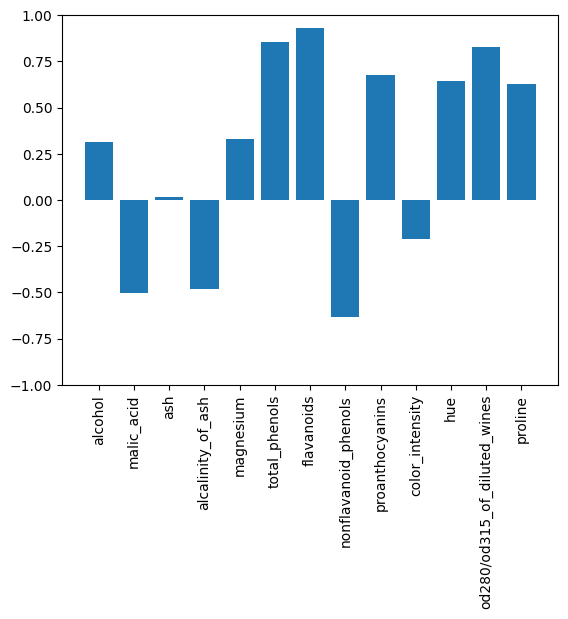

In [31]:
sklearn_loadings = pca.components_.T*np.sqrt(pca.explained_variance_)
plt.bar(np.arange(1, 14), sklearn_loadings[:, 0], align='center')
plt.ylim([-1, 1])
plt.xticks(np.arange(1, 14), labels=columns, rotation=90)